<a href="https://colab.research.google.com/github/TACH00/Evidencia/blob/main/LastMile_Evidencia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [68]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from funpymodeling.exploratory import freq_tbl

In [ ]:
#Cargar archivo excel desde equipo
from google.colab import files
files.upload()

In [35]:
#Carga desde un archivo excel sin indice 
data= pd.read_excel('lastmile_delivery_operations_mit_lift_lab.xlsx')

In [36]:
#Verificamos información del Dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   _record_id                                     390 non-null    object 
 1   _title                                         380 non-null    object 
 2   _server_updated_at                             390 non-null    object 
 3   _created_by                                    390 non-null    object 
 4   _updated_by                                    390 non-null    object 
 5   _geometry                                      390 non-null    object 
 6   _latitude                                      390 non-null    float64
 7   _longitude                                     390 non-null    float64
 8   arrival_of_the_freight_vehicle                 390 non-null    object 
 9   plates                                         389 non

In [37]:
#Corroboramos valores nulos 
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                                         0
_title                                            10
_server_updated_at                                 0
_created_by                                        0
_updated_by                                        0
_geometry                                          0
_latitude                                          0
_longitude                                         0
arrival_of_the_freight_vehicle                     0
plates                                             1
company_if_visible                               155
visit_purpose                                      0
type_of_vehicle                                    0
number_of_operators                                0
refrigerated_truck                                 0
type_of_cargo                                      1
picture_of_the_parked_freight_vehicle              0
departure_of_the_freight_vehicle                   0
where_was_the_vehicle_parked                  

In [38]:
data.head(3)

,_record_id,_title,_server_updated_at,_created_by,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,1e369271-598a-464c-aec7-1913e82dc2b7,78 Avenida Orión Sur\nTlaxcalancingo Puebla 72...,2022-11-27 22:14:32 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2603919 19.0213764),19.021376,-98.260392,15:35,21TFP4,...,no,Rear,0,NaN,no,no,NaN,no,no,NaN
1,4a749c00-7c5f-45cf-8950-aa988a0d41b8,581 Avenida Orión Sur\nTlaxcalancingo Puebla 7...,2022-11-27 22:14:31 UTC,Adriel Antonio Huerta Vidal,Adriel Antonio Huerta Vidal,SRID=4326;POINT(-98.2605677 19.0211113),19.021111,-98.260568,15:12,19TES7,...,no,Rear,0,NaN,no,no,NaN,no,no,NaN
2,c58a450d-fe1f-4a16-a8d8-764ebd8c49a4,4483 Calle Camino Real a Cholula\nSan Bernardi...,2022-11-27 20:12:39 UTC,María Pedraza,María Pedraza,SRID=4326;POINT(-98.2670348883 19.0352214575),19.035221,-98.267035,13:50,Sm49187,...,no,Rear,0,NaN,no,no,NaN,no,yes,NaN


In [ ]:
#Eliminar columnas innecesarias
data2=data.drop(["_record_id", "_geometry","picture_of_the_parked_freight_vehicle","serving_customer","describe_the_accident","maximum_number_of_vehicles_in_the_traffic_jam"], axis=1) #axis1=columnas y axis0=filas
data2.head()

In [41]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   _title                               380 non-null    object 
 1   _server_updated_at                   390 non-null    object 
 2   _created_by                          390 non-null    object 
 3   _updated_by                          390 non-null    object 
 4   _latitude                            390 non-null    float64
 5   _longitude                           390 non-null    float64
 6   arrival_of_the_freight_vehicle       390 non-null    object 
 7   plates                               389 non-null    object 
 8   company_if_visible                   235 non-null    object 
 9   visit_purpose                        390 non-null    object 
 10  type_of_vehicle                      390 non-null    object 
 11  number_of_operators             

In [ ]:
#Filtro por columnas, de acuerdo a la información obtenida arriba obtenemos las cuantitativas
cuant=data2.iloc[ : , [11,19]]  #columnas no consecutivas 
cuant

In [ ]:
#Eliminar columnas innecesarias para crear el subdf de las cualitativas
cualit=data2.drop(["_latitude", "_longitude","number_of_operators","number_of_available_trolleys"], axis=1) #axis1=columnas y axis0=filas
cualit

In [45]:
#Corroboramos valores nulos 
valores_nulos=cualit.isnull().sum()
valores_nulos
#cualit.info()

_title                                  10
_server_updated_at                       0
_created_by                              0
_updated_by                              0
arrival_of_the_freight_vehicle           0
plates                                   1
company_if_visible                     155
visit_purpose                            0
type_of_vehicle                          0
refrigerated_truck                       0
type_of_cargo                            1
departure_of_the_freight_vehicle         0
where_was_the_vehicle_parked             0
while_parked_was_the_engine_running      0
used_traffic_cone                        0
vehicles_unloading_door                  0
garage_blocking                          0
accident                                 0
noise                                    0
traffic_congestion                       0
dtype: int64

In [ ]:
#Sustituir valores nulos por valores no nulos hacia adelante "forward fill"("ffill")
cualit["_title"]=cualit["_title"].fillna(method="ffill")
cualit["plates"]=cualit["plates"].fillna(method="bfill")
cualit["type_of_cargo"]=cualit["type_of_cargo"].fillna(method="bfill")
#Sustituir valores nulos por un string en concreto
cualit["company_if_visible"]=cualit["company_if_visible"].fillna("Sin registro")
cualit

In [47]:
valores_nulos=cualit.isnull().sum()
valores_nulos

_title                                 0
_server_updated_at                     0
_created_by                            0
_updated_by                            0
arrival_of_the_freight_vehicle         0
plates                                 0
company_if_visible                     0
visit_purpose                          0
type_of_vehicle                        0
refrigerated_truck                     0
type_of_cargo                          0
departure_of_the_freight_vehicle       0
where_was_the_vehicle_parked           0
while_parked_was_the_engine_running    0
used_traffic_cone                      0
vehicles_unloading_door                0
garage_blocking                        0
accident                               0
noise                                  0
traffic_congestion                     0
dtype: int64

In [48]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuant
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido number_of_operators             4.009477
number_of_available_trolleys    2.962660
dtype: float64
Limite inferior permitido number_of_operators            -0.753067
number_of_available_trolleys   -1.767788
dtype: float64


In [49]:
#Encontramos Ouliers del Dataframe
outliers= cuant[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,number_of_operators,number_of_available_trolleys
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
385,NaN,NaN
386,NaN,NaN
387,NaN,NaN
388,NaN,NaN


In [52]:
valores_nulos=outliers.isnull().sum()
valores_nulos

number_of_operators             387
number_of_available_trolleys    386
dtype: int64

Ya que al hacer la operación nos da un numéro demasiado elevado, casi el total de entradas, no se hará el procedimiento de outliers

In [ ]:
# Unimos las columnas en el dataframe
lonnylat=data2.iloc[ : , [4,5]]
cuant2 = pd.concat([lonnylat, cuant], axis=1)
cuant2

In [55]:
LMLEvidencia = pd.concat([cuant2, cualit], axis=1)
LMLEvidencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   _latitude                            390 non-null    float64
 1   _longitude                           390 non-null    float64
 2   number_of_operators                  390 non-null    int64  
 3   number_of_available_trolleys         390 non-null    int64  
 4   _title                               390 non-null    object 
 5   _server_updated_at                   390 non-null    object 
 6   _created_by                          390 non-null    object 
 7   _updated_by                          390 non-null    object 
 8   arrival_of_the_freight_vehicle       390 non-null    object 
 9   plates                               390 non-null    object 
 10  company_if_visible                   390 non-null    object 
 11  visit_purpose                   

In [56]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=LMLEvidencia.isnull().sum().sum()
valores_nulos

0

In [57]:
#Convertir DataFrame a CSV
LMLEvidencia.to_csv("LMLEvidencia.csv")

In [58]:
#descargar archivo filtrado en csv
from google.colab import files 
files.download("LMLEvidencia.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se finaliza la descarga con un dataframe más limpio, con menos variables desgraciadamente y dificil de tratar sin embargo listo en cuanto al filtrado

Tratamiento de variables (filtrado)

In [59]:
LMLEvidencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   _latitude                            390 non-null    float64
 1   _longitude                           390 non-null    float64
 2   number_of_operators                  390 non-null    int64  
 3   number_of_available_trolleys         390 non-null    int64  
 4   _title                               390 non-null    object 
 5   _server_updated_at                   390 non-null    object 
 6   _created_by                          390 non-null    object 
 7   _updated_by                          390 non-null    object 
 8   arrival_of_the_freight_vehicle       390 non-null    object 
 9   plates                               390 non-null    object 
 10  company_if_visible                   390 non-null    object 
 11  visit_purpose                   

In [ ]:
#Realizamos otro filtro por filas donde se incluyan las vafriables que se van a utilizar para la visualización y extracción
variables_buenas=LMLEvidencia.iloc[:,[2,3,4,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
variables_buenas

In [ ]:
#Obtengo  un analisis univariado de las variables categóricas
freq_tbl(variables_buenas)

Variables

In [ ]:
#Obtengo un analisis univariado de una variable categórica en especifico
table1= freq_tbl(variables_buenas['_created_by'])
table1

In [78]:
#Obtengo un filtro de los valores mas relevantes de las variables categoricas seleccionadas
Filtro= table1[table1['frequency']>6]
Filtro

,_created_by,frequency,percentage,cumulative_perc
0,Adriel Antonio Huerta Vidal,40,0.102564,0.102564
1,Mariana Sáenz Gómez Ortigoza,21,0.053846,0.156410
2,María Pedraza,21,0.053846,0.210256
3,Juan Carlos Bejarano Moreno,21,0.053846,0.264103
4,José López,20,0.051282,0.315385
5,Luis Gerardo Ramírez Lastra,19,0.048718,0.364103
6,Gustavo Manzanilla,18,0.046154,0.410256
7,Diego Arrieta,17,0.043590,0.453846
8,Pedro Contreras,17,0.043590,0.497436
9,Julio Vázquez,15,0.038462,0.535897


In [79]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('_created_by')
Filtro_index

,frequency,percentage,cumulative_perc
_created_by,,,
Adriel Antonio Huerta Vidal,40,0.102564,0.102564
Mariana Sáenz Gómez Ortigoza,21,0.053846,0.156410
María Pedraza,21,0.053846,0.210256
Juan Carlos Bejarano Moreno,21,0.053846,0.264103
José López,20,0.051282,0.315385
Luis Gerardo Ramírez Lastra,19,0.048718,0.364103
Gustavo Manzanilla,18,0.046154,0.410256
Diego Arrieta,17,0.043590,0.453846
Pedro Contreras,17,0.043590,0.497436


Text(0, 0.5, 'Frecuencia')

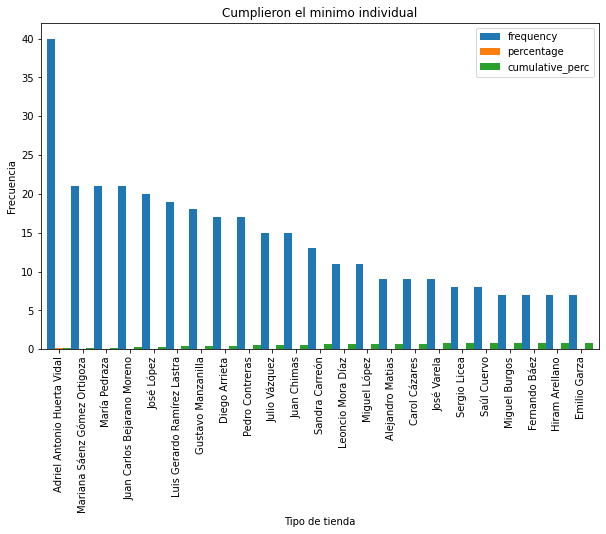

In [81]:
#Realizamos gráfico de barras del datarame filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,6))
plt.title('Cumplieron el minimo individual')
plt.xlabel('Tipo de tienda')
plt.ylabel('Frecuencia')

Para terminar mostramos un ejemplo de extracción de una variable relevante para casos academicos que sería por ejemplo quienes fueron los que más aportaron a la recolección en este Tipo de Registro